# Produisez une étude de marché

# Scénario
Votre entreprise **d'agroalimentaire** souhaite se développer à l'international. Elle est spécialisée dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **à cibler plus particulièrement certains pays**, dans le but d'approfondir ensuite l'étude de marché. Plus particulièrement, l'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).


Pour identifier les pays propices à une insertion dans le marché du poulet,
 Il vous a été demandé de cibler les pays. 
 Etudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.


Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;
disponibilité alimentaire en protéines par habitant ;
disponibilité alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

In [281]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca
from sklearn.cluster import KMeans
from sklearn import cluster


In [282]:
#Versions utilisées
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


In [283]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})

In [284]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

# Mission 1:  Construisez l'échantillon contenant l'ensemble des pays disponibles.
chacun caractérisé par ces variables :

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;
disponibilité alimentaire en protéines par habitant ;
disponibilité alimentaire en calories par habitant.

## 1. La population par pays
la variation de la population entre 2009 et 2019, en %, qui sera positive en cas de croissance ou négative en cas de baisse démographique ;

Sources FAO (https://www.fao.org/faostat/fr/#data/OA)

In [285]:
df_population = pd.read_csv('datas/fao-populations_2019- 2009.csv' , header=0, sep=",", decimal=".")
df_population.head(2)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2009,2009,1000 personnes,28394.813,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,38041.754,X,Sources internationales sûres,NaN


In [286]:
df_population = df_population[['Code zone (FAO)', 'Zone', 'Produit', 'Année', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

,Code zone (FAO),Zone,Produit,Année,Valeur
0,2,Afghanistan,Population-Estimations,2009,28394813.0
1,2,Afghanistan,Population-Estimations,2019,38041754.0
2,202,Afrique du Sud,Population-Estimations,2009,50477011.0
3,202,Afrique du Sud,Population-Estimations,2019,58558270.0
4,3,Albanie,Population-Estimations,2009,2973048.0


In [287]:
#pivot
df_population = df_population.pivot_table(index=['Zone'], columns='Année', values = 'Valeur', aggfunc = sum).reset_index()

#rename
df_population.columns = ['Zone', '2009', '2019']

#variable creation
df_population['Évolution population (%)'] = round((df_population['2019'] - df_population['2009']) /
                                               df_population['2019'] ,2)


population2009 = df_population['2009'].sum()
population2019 = df_population['2019'].sum()
evolution_globale = round(((population2019 - population2009) / population2009)*100,3)
print('Pour indication, la population totale en 2009 était de', population2009, 'et de', population2019, 'en 2019.\nL\'évolution 2009/2019 est de', evolution_globale, '%.')


df_population= df_population.rename(columns= {'2019': 'population',})
df_population= df_population[[ 'Zone' , 'population' ,'Évolution population (%)']]

#show

df_population


Pour indication, la population totale en 2009 était de 8264492100.0 et de 9179381901.0 en 2019.
L'évolution 2009/2019 est de 11.07 %.


,Zone,population,Évolution population (%)
0,Afghanistan,38041754.0,0.25
1,Afrique du Sud,58558270.0,0.14
2,Albanie,2880917.0,-0.03
3,Algérie,43053054.0,0.18
4,Allemagne,83517045.0,0.03
...,...,...,...
233,Îles Salomon,669823.0,0.23
234,Îles Turques-et-Caïques,38191.0,0.16
235,Îles Vierges américaines,104578.0,-0.02
236,Îles Vierges britanniques,30030.0,0.10


In [288]:
df_population.shape

(238, 3)

## 2. Données sur les bilans alimentaires mondiaux (2019)


le ratio entre la quantité de protéines d’origine animale et la quantité totale de protéines consommées ;

Sources FAO (http://www.fao.org/faostat/fr/#data)


In [289]:
df_dispo_alimentaire = pd.read_csv('datas/les bilans alimentaires 2019.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilit? alimentaire (Kcal/personne/jour),2901,Total General,2019,2019,Kcal/personne/jour,2273.00,Fc,Donn?e calcul?e
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilit? de prot?ines en quantit? (g/pers...,2901,Total General,2019,2019,g/personne/jour,57.31,Fc,Donn?e calcul?e
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilit? alimentaire (Kcal/personne/jour),2941,Produits Animaux,2019,2019,Kcal/personne/jour,187.00,Fc,Donn?e calcul?e
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilit? de prot?ines en quantit? (g/pers...,2941,Produits Animaux,2019,2019,g/personne/jour,10.34,Fc,Donn?e calcul?e


In [290]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=[ 'Zone'],
                                columns=['Élément', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

KeyError: 'Élément'

In [291]:
df_dispo_alimentaire["ratio_proteines_animales(%)"] = round((df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General')]),2)
df_dispo_alimentaire

KeyError: ('Disponibilité de protéines en quantité (g/personne/jour)', 'Produits Animaux')

## 3.  Les valeurs de PIB par habitant,
https://www.fao.org/faostat/fr/#data/FS

In [292]:
# Dataframes des données complémentaires
# Indicateurs Macro (PIB et croissance)
df_PIB_habitant = pd.read_csv('datas/PIB par habitant.csv', header=0, sep=',', decimal='.')

df_PIB_habitant

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,469.919090,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,6001.389576,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,5303.197823,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,3975.510381,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,46231.563366,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,MK,Indicateurs macro,236,Venezuela (République bolivarienne du),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,4732.820093,X,Sources internationales sûres,NaN
207,MK,Indicateurs macro,237,Viet Nam,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,2715.275874,X,Sources internationales sûres,NaN
208,MK,Indicateurs macro,249,Yémen,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,855.066811,X,Sources internationales sûres,NaN
209,MK,Indicateurs macro,251,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,1292.482076,X,Sources internationales sûres,NaN


In [248]:
df_PIB_habitant = df_PIB_habitant[['Zone','Élément','Valeur','Produit']]
df_PIB_habitant = df_PIB_habitant.pivot_table(index=['Zone'], columns='Produit', values='Valeur', aggfunc=sum).reset_index()
df_PIB_habitant = df_PIB_habitant.rename(columns={'Produit Intérieur Brut':"PIB_par_habitant"})
                             
df_PIB_habitant

Produit,Zone,PIB_par_habitant
0,Afghanistan,469.919090
1,Afrique du Sud,6001.389576
2,Albanie,5303.197823
3,Algérie,3975.510381
4,Allemagne,46231.563366
...,...,...
206,Îles Cook,21603.464347
207,Îles Marshall,4038.170230
208,Îles Salomon,1944.818169
209,Îles Turques-et-Caïques,31353.460239


## 4. Production viande de Volailles, taux d'autosuffisance
défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

https://www.fao.org/faostat/fr/#data/FBS

In [249]:
df_viande_volailles = pd.read_csv('datas/la viande de volailles.csv', header=0, sep=",", decimal=".")
df_viande_volailles.head(5)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,28,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,44,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2019,2019,Milliers de tonnes,67,S,Données standardisées
3,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,1816,Im,Données de la FAO basées sur une méthodologie ...
4,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,488,Im,Données de la FAO basées sur une méthodologie ...


In [250]:
df_viande_volailles = df_viande_volailles.pivot_table(index=['Zone'],
                                columns=['Élément'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
#Le taux_suffisance= Production  ÷ (Production alimentaire domestique + importations ー exportations) ×100
df_viande_volailles['taux_suffisance(٪)']=((df_viande_volailles['Production'] ) / 
                                           (df_viande_volailles['Disponibilité intérieure']))



#le taux de dépendance aux importations, défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

df_viande_volailles['taux_dépendance_importations(٪)']=(df_viande_volailles['Importations - Quantité'] / df_viande_volailles['Disponibilité intérieure'])


df_viande_volailles['Production'] = df_viande_volailles['Production']*1000000
df_viande_volailles['Importations'] = df_viande_volailles['Importations - Quantité']*1000000


df_viande_volailles = df_viande_volailles[['Zone','taux_suffisance(٪)','taux_dépendance_importations(٪)']]


df_viande_volailles

Élément,Zone,taux_suffisance(٪),taux_dépendance_importations(٪)
0,Afghanistan,0.417910,0.656716
1,Afrique du Sud,0.830741,0.223239
2,Albanie,0.352941,0.647059
3,Algérie,1.013937,0.000000
4,Allemagne,0.901869,0.485397
...,...,...,...
175,Émirats arabes unis,0.069337,1.057011
176,Équateur,0.996805,0.000000
177,États-Unis d'Amérique,1.184659,0.006375
178,Éthiopie,0.987179,0.012821


**Le taux d'auto-suffisance alimentaire** est un indice permettant de mesurer l'importance de la production alimentaire d'un pays par rapport à sa consommation intérieure.




In [251]:
df= pd.merge(df_population, df_dispo_alimentaire, on="Zone")

df = df[["Zone", 'population','Évolution population (%)',
                                             ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'),
                                             ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'),
                                            ('ratio_proteines_animales(%)', '')]]
df.rename(columns={('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'):'dispo_calories',
                              ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'):'dispo_proteines',
                            ('ratio_proteines_animales(%)', ''):'ratio_proteines_animales(%)'},
                     inplace=True)



df['dispo_calories'] = df['dispo_calories']*365
df['dispo_proteines'] = df['dispo_proteines']*365


df= pd.merge(df, df_PIB_habitant, on="Zone")
df.head()


df= pd.merge(df, df_viande_volailles, on="Zone")
df.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Zone,population,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
0,Afghanistan,38041754.0,0.25,2273.0,57.31,0.18,469.919090,0.417910,0.656716
1,Afrique du Sud,58558270.0,0.14,2898.0,79.77,0.44,6001.389576,0.830741,0.223239
2,Albanie,2880917.0,-0.03,3338.0,116.02,0.54,5303.197823,0.352941,0.647059
3,Algérie,43053054.0,0.18,3493.0,90.84,0.27,3975.510381,1.013937,0.000000
4,Allemagne,83517045.0,0.03,3559.0,104.24,0.60,46231.563366,0.901869,0.485397


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Zone                             179 non-null    object 
 1   population                       179 non-null    float64
 2   Évolution population (%)         178 non-null    float64
 3   dispo_calories                   179 non-null    float64
 4   dispo_proteines                  179 non-null    float64
 5   ratio_proteines_animales(%)      179 non-null    float64
 6   PIB_par_habitant                 179 non-null    float64
 7   taux_suffisance(٪)               177 non-null    float64
 8   taux_dépendance_importations(٪)  178 non-null    float64
dtypes: float64(8), object(1)
memory usage: 14.0+ KB


In [253]:
#Identifier la présence de doublons
print(df.duplicated().sum())


0


In [254]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

,Zone,population,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
45,Djibouti,973560.0,0.15,2795.0,65.93,0.20,3252.320409,NaN,1.000000
95,Maldives,530953.0,0.33,2212.0,80.01,0.61,10626.484440,NaN,0.916667
149,Soudan,42813238.0,NaN,2581.0,75.87,0.26,815.060101,1.339286,0.000000
168,Venezuela (République bolivarienne du),28515829.0,0.02,2204.0,51.55,0.44,4732.820093,1.000000,NaN


In [255]:
df=df.dropna()


In [256]:
df.describe()

,population,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,5.158291e+07,0.117257,2894.588571,81.891829,0.427657,14443.920020,0.783882,0.442286
std,1.879227e+08,0.104614,456.179514,21.016290,0.160487,20010.263467,0.652157,0.502782
min,5.282300e+04,-0.240000,1707.000000,25.910000,0.060000,260.381563,0.000000,0.000000
25%,2.914598e+06,0.050000,2582.000000,65.395000,0.290000,1879.657770,0.343137,0.044570
50%,9.770529e+06,0.110000,2883.000000,82.240000,0.440000,6108.558032,0.875000,0.268657
75%,3.188754e+07,0.190000,3298.500000,97.365000,0.560000,17247.236109,1.014322,0.787968
max,1.465634e+09,0.420000,3862.000000,143.940000,0.750000,115480.867570,6.953020,4.040268


In [257]:
#Retrait du pays 'France' sur notre échantillon 
df = df[df['Zone'] != 'France']

In [258]:
#Calcul de fréquence en Chine
df[df['Zone'].str.contains('hin')]

,Zone,population,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
32,Chine,1.465634e+09,0.05,3340.0,105.11,0.40,10238.512141,0.991069,0.084822
33,Chine - RAS de Hong-Kong,7.436154e+06,0.07,3236.0,129.45,0.75,49180.094302,0.043182,1.756818
34,Chine - RAS de Macao,6.404450e+05,0.18,3312.0,107.31,0.64,84096.705446,0.136364,1.454545
35,"Chine, continentale",1.433784e+09,0.05,3347.0,105.30,0.39,10003.555003,1.022049,0.039748


In [259]:
#Supprimer la ligne Chine
df = df[df['Zone'] != 'Chine']



In [260]:
#Vérification d'éventuelles valeurs manquantes et/ou en doubles dans l'échantillon
print(df.duplicated().sum())
print(df.isna().sum())

0
Zone                               0
population                         0
Évolution population (%)           0
dispo_calories                     0
dispo_proteines                    0
ratio_proteines_animales(%)        0
PIB_par_habitant                   0
taux_suffisance(٪)                 0
taux_dépendance_importations(٪)    0
dtype: int64


In [261]:
df= df.rename(columns={'Zone': 'pays'} )

In [262]:
df.style.background_gradient(cmap='BrBG')


,pays,population,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
0,Afghanistan,38041754.000000,0.250000,2273.000000,57.310000,0.180000,469.919090,0.417910,0.656716
1,Afrique du Sud,58558270.000000,0.140000,2898.000000,79.770000,0.440000,6001.389576,0.830741,0.223239
2,Albanie,2880917.000000,-0.030000,3338.000000,116.020000,0.540000,5303.197823,0.352941,0.647059
3,Algérie,43053054.000000,0.180000,3493.000000,90.840000,0.270000,3975.510381,1.013937,0.000000
4,Allemagne,83517045.000000,0.030000,3559.000000,104.240000,0.600000,46231.563366,0.901869,0.485397
5,Angola,31825295.000000,0.290000,2445.000000,52.090000,0.300000,2670.850732,0.149847,0.850153
6,Antigua-et-Barbuda,97118.000000,0.110000,2485.000000,80.800000,0.640000,17112.821135,0.000000,1.000000
7,Arabie saoudite,34268528.000000,0.220000,3302.000000,89.550000,0.400000,23139.802114,0.558269,0.453594
8,Argentine,44780677.000000,0.100000,3304.000000,106.950000,0.630000,10041.463303,1.112871,0.002475
9,Arménie,2957731.000000,0.020000,3022.000000,94.290000,0.560000,4622.733216,0.218182,0.781818


In [263]:
df.shape

(173, 9)

In [264]:
df.to_csv('exports/df.csv', index=False)

In [265]:
df = df[df['pays'] != 'Pays-Bas']

# Mission 2 : réalisation d'un dendrogramme

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 


# Environnement


In [266]:
#pays comme index
df_clus=df.set_index('pays', drop=True, append=False, inplace=False, verify_integrity=False)

# préparation des données pour le clustering
df_clus = df_clus[["Évolution population (%)", "dispo_calories",
                                 "dispo_proteines","ratio_proteines_animales(%)",
                                 'PIB_par_habitant','taux_suffisance(٪)','taux_dépendance_importations(٪)']]

df_clus.head(2)


,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
pays,,,,,,,
Afghanistan,0.25,2273.0,57.31,0.18,469.919090,0.417910,0.656716
Afrique du Sud,0.14,2898.0,79.77,0.44,6001.389576,0.830741,0.223239


# Aperçu des corrélations

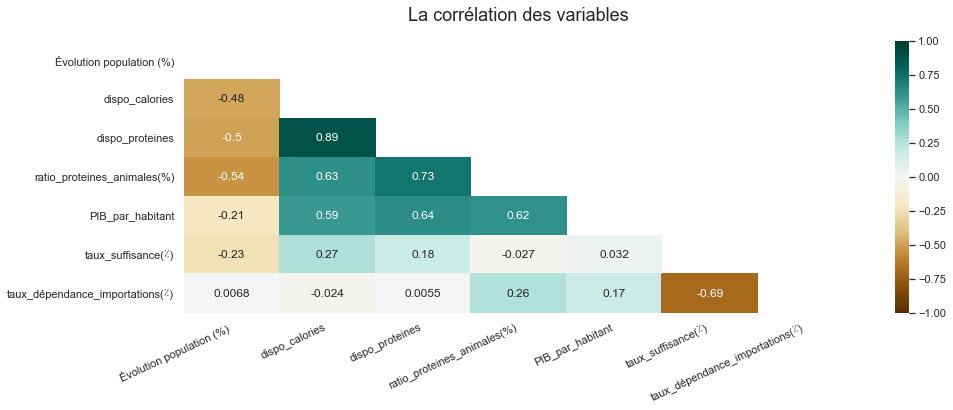

In [267]:
plt.figure(figsize=(15,5))

mask = np.zeros_like(df_clus.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_clus.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.xticks(rotation=25, ha='right')
plt.title('La corrélation des variables',  fontsize=18, pad=20)

plt.show()

# Observations

D'après le tableau de corrélation coloré ci-dessus, on peut constater une corrélation positive  forte entre la disponibilité alimentaire en protéine par personnes et celle en kcal par personne .

On peut aussi  constater une corrélation positive  forte entre la pourcentage de protéine d'origine animale et celle en kcal  , protéines par personne et le PIB

Dans une moindre mesure, on retrouve également une corrélation négative entre le pourcentage d'évolution de la population et les différents régimes alimentaires des pays (protéines, kcal, pourcentage de protéine d'origine animale).

Nous sommes intéressés par les pays les plus susceptibles de consommer du poulet, donc ceux ayant un fort ratio de protéines animales. Les corrélations montrent que ces pays sont susceptibles d'avoir un fort PIB, et de grandes disponibilités en protéines et calories.

# Clustering

## Classification des pays via Clustering Hiérarchique Ascendant (CHA)

La classification sera établie sur la base des variables suivantes :

**La différence de population entre l'année 2013 et l'année 2019, exprimée en pourcentage;\
La proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays;\
La disponibilité alimentaire en grammes de protéines par habitant ;\
La disponibilité alimentaire en Kcal par habitant.\
PIB par habitant.\
Rapport de dépendance à l'importation.\
La taux suffisance(٪).\**

L'échantillon comporte peu de variables sur la dimension dite du "Régime alimentaire", il comporte également un nombre de pays "maîtrisables" qui permet de commencer par une classification hiérarchique. Algorithme qui a une forte complexité algorithmique en temps et en espace, le clustering hiérarchique est recommandé pour les petits échantillons.


# Premier clustering

Le partitionnement ou clustering a pour objectif de créer des groupes d’observations homogènes.

Au préalable, il est nécessaire de centrer-réduire les données. C’est à dire, recalculer chaque valeur de manière à ce que la moyenne de la variable soit égale à 0 et la variance et l’écart-type égalent 1. Pour une variable donnée, on soustrait à chaque valeur la moyenne de la variable, puis on divise le tout par l’écart-type.

Ensuite, nous pouvons procéder à la classification ascendante hiérarchique selon la méthode de Ward. **L’objectif est de regrouper des pays similaires.**

In [268]:
# dans array numpy
X = df_clus.values 
pays = df_clus.index
#nous allons extraire les données d'expression de 172 pays  dans un tableau de données numériques .
 #X comporte uniquement les données  , il ne contient pas les étiquettes des échantillons.
 #Conservons les étiquettes de chaque échantillon  dans la variable pays.





In [269]:
# Centrage et Réduction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()
X_cr = std_scale.fit_transform(X)

#Standardisez les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
#Le score standard d'un échantillon x est calculé comme suit :
#z = (x - u) / s où
# u est la moyenne des échantillons d'apprentissage ou zéro si with_mean=False, 
# s est l'écart type des échantillons d'apprentissage ou un si with_std=False.


print('X_cr', X_cr.shape)
X_cr = pd.DataFrame(X_cr, index =df_clus.index, columns=df_clus.columns)
X_cr.head(2)

X_cr (172, 7)


,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
pays,,,,,,,
Afghanistan,1.254842,-1.350758,-1.157091,-1.534301,-0.687846,-0.719898,0.549411
Afrique du Sud,0.204328,0.027279,-0.080195,0.089698,-0.408565,0.187724,-0.474224


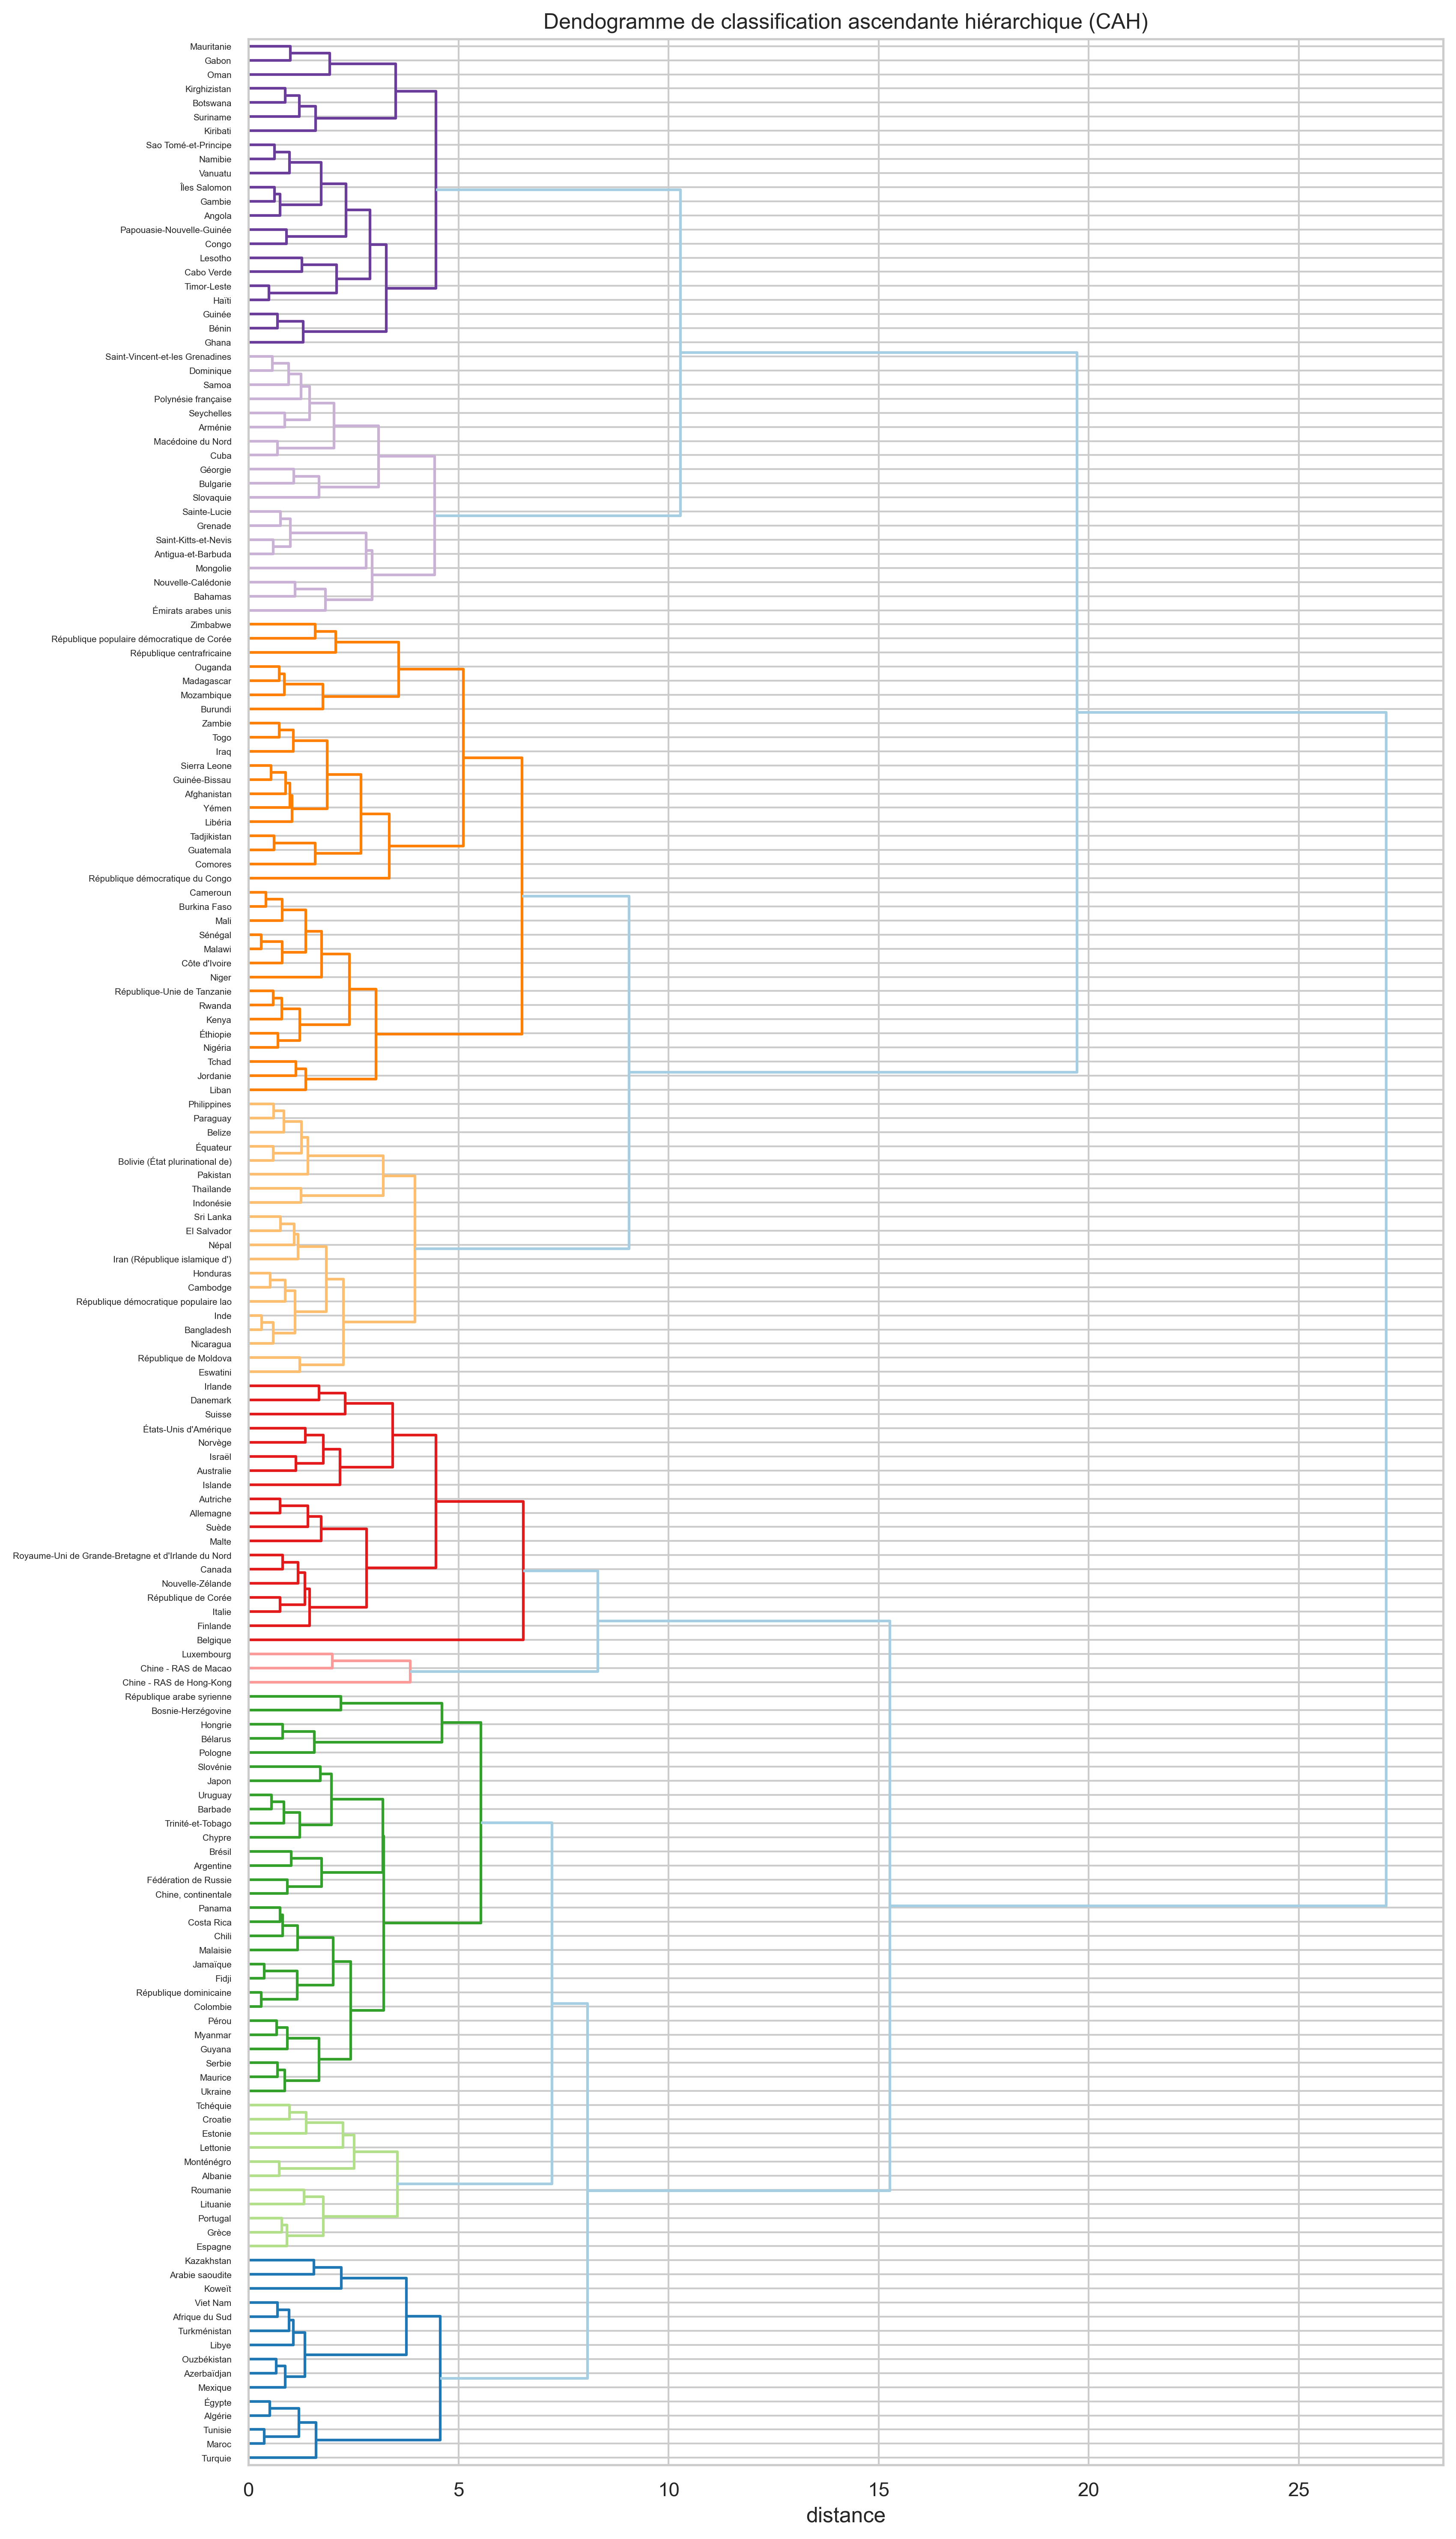

In [270]:
# Clustering hiérarchique avec librairie scipy
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
z=linkage(X_cr, method='ward' ,metric='euclidean')

# Affichage du dendogramme
plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    z,#Regroupement hiérarchique encodé avec la matrice renvoyée par la fonction de linkage.
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.savefig('exports/dendogram_CAH_1.png')
plt.show()

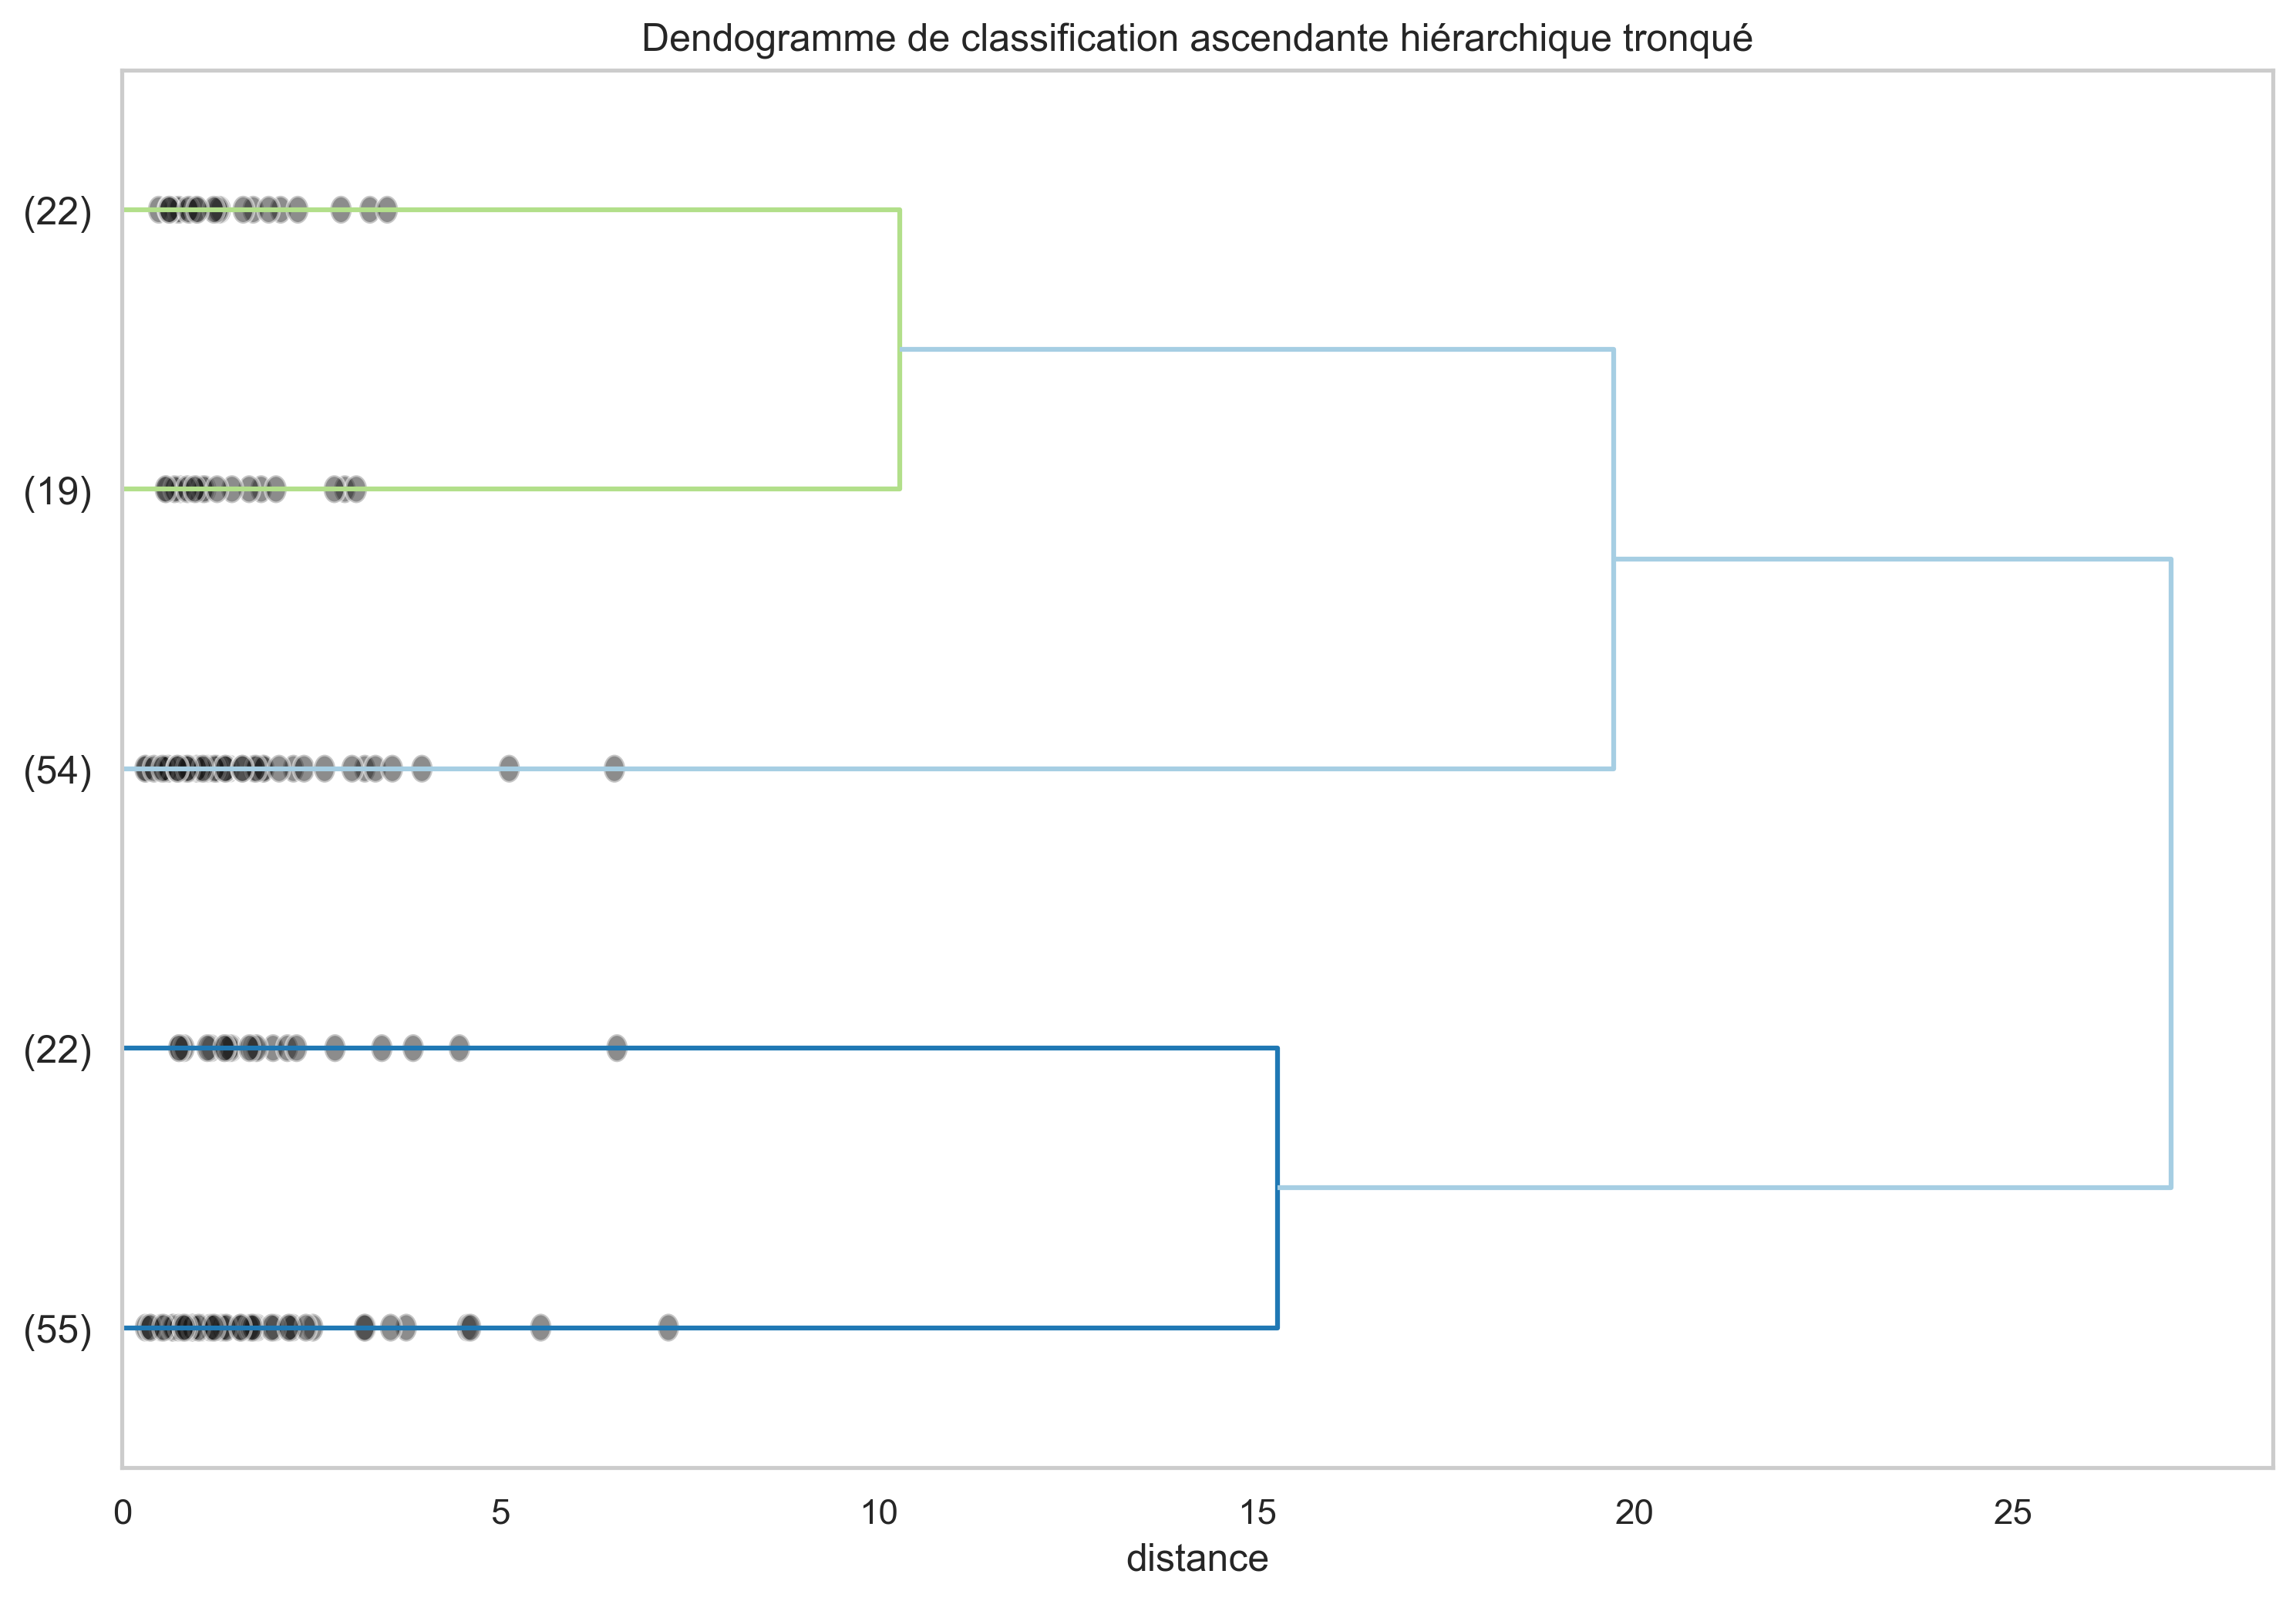

In [271]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique tronqué')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    linkage(X_cr, method='ward' ,metric='euclidean'),
    truncate_mode='lastp', #Les p derniers clusters non singleton formés dans la liaison sont les seuls nœuds non feuilles dans la liaison ; 
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,)
plt.savefig('exports/dendogram_CAH_truncated_1.png')
plt.show()



# Attribution des 5 groupes et World map de répartition

In [272]:
# Coupage du dendrogramme en 5 clusters avec Scipy
clusters_cah = fcluster(z, 5, criterion='maxclust')
#criterion , Critère à utiliser pour former des clusters plats. 
#maxclust : Trouve un seuil minimum r pour que la distance cophénétique entre deux observations originales quelconques dans le même cluster plat ne soit pas supérieure à r et que pas plus de t clusters plats soient formés.

#index triés des groupes
idg = np.argsort(clusters_cah)
#Renvoie les indices qui trieraient un tableau.

#affichage des pays et leurs groupes
df_groupage_1 = pd.DataFrame(columns=["groupe_cah","pays"])
df_groupage_1["pays"] = df_clus.index[idg]
df_groupage_1["groupe_cah"] = clusters_cah[idg]
df_groupage_1

,groupe_cah,pays
0,1,Fédération de Russie
1,1,Colombie
2,1,Tchéquie
3,1,Maroc
4,1,Costa Rica
...,...,...
167,5,Papouasie-Nouvelle-Guinée
168,5,Oman
169,5,Mauritanie
170,5,Timor-Leste


In [228]:
# Jointure pour ajout des groupes dans le dataframe principal
df_groupes_cah = pd.merge(df_clus, df_groupage_1, on="pays")
df_groupes_cah.to_csv('exports/df_groupes_cah.csv', index=False)
df_groupes_cah.sample(5)

,pays,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪),groupe_cah
155,Trinité-et-Tobago,0.05,2959.0,85.05,0.52,16637.259813,0.696629,0.280899,1
154,Togo,0.23,2464.0,56.80,0.17,899.490744,0.647059,0.367647,3
61,Géorgie,-0.03,2860.0,79.11,0.42,4439.323978,0.323529,0.794118,4
96,Mauritanie,0.25,2875.0,82.92,0.38,1677.917728,0.166667,1.033333,5
75,Jordanie,0.32,2529.0,63.72,0.39,4405.480596,0.780591,0.261603,3


In [229]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah.groupby('groupe_cah').mean()

,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
groupe_cah,,,,,,,
1,0.051273,3171.309091,93.926364,0.491091,12274.514564,0.971417,0.247566
2,0.084545,3483.590909,110.807273,0.612727,57414.265319,0.875417,0.506127
3,0.189444,2477.796296,62.526111,0.264259,2277.822322,0.894792,0.163872
4,0.055263,2880.578947,84.464737,0.555789,15203.205302,0.156274,0.961873
5,0.201818,2578.863636,64.689545,0.358636,3363.658189,0.192090,0.957381


In [230]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['groupe_cah'] == 5]


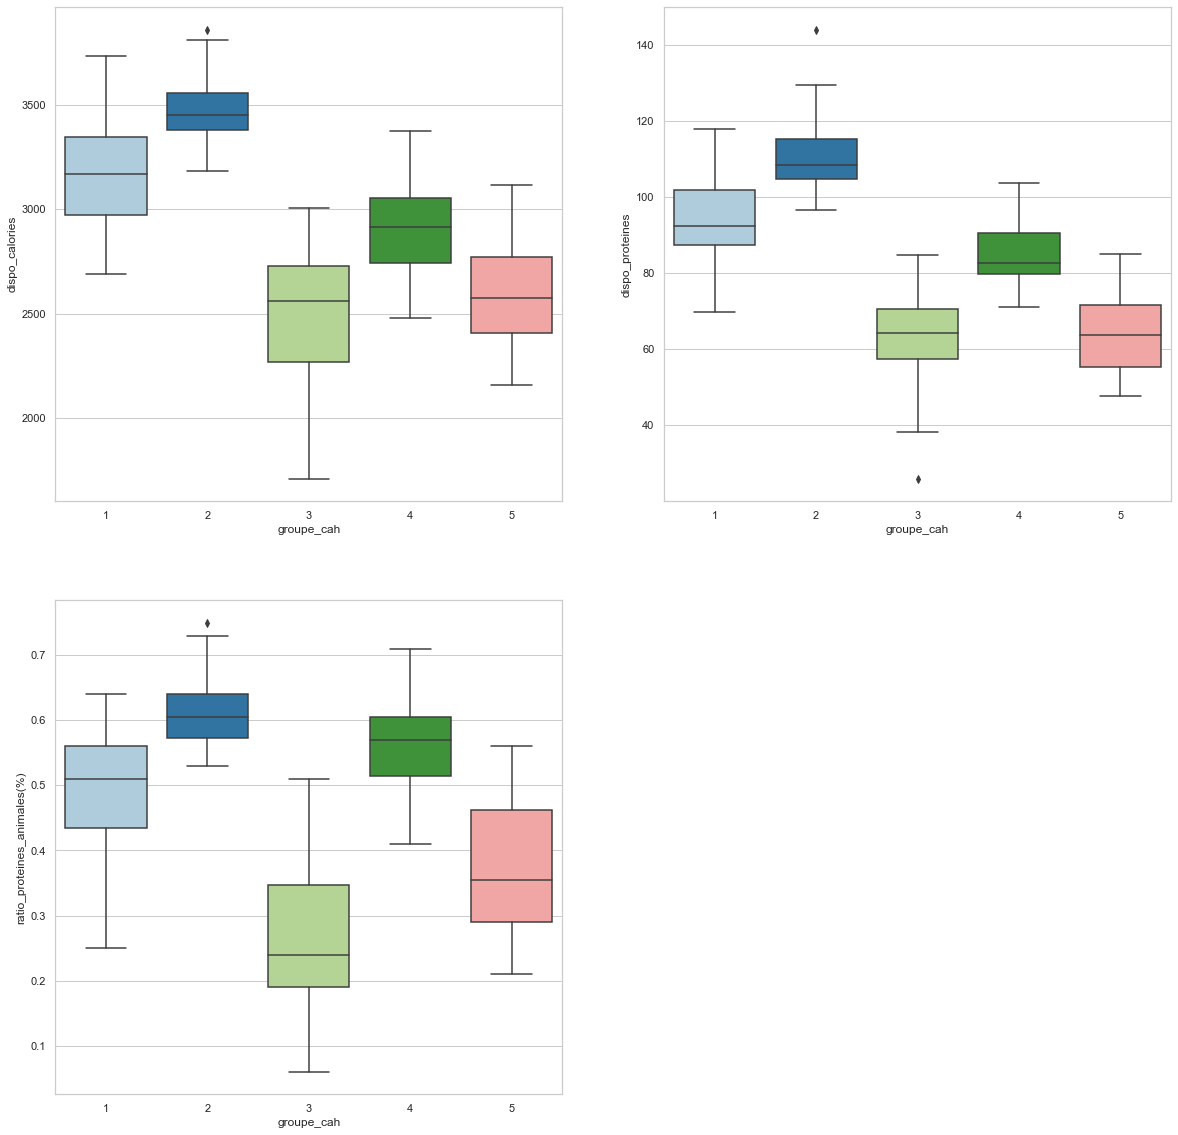

In [274]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='ratio_proteines_animales(%)')



plt.savefig("exports/boxplot_dendogramme1.png")

plt.show(block=False)

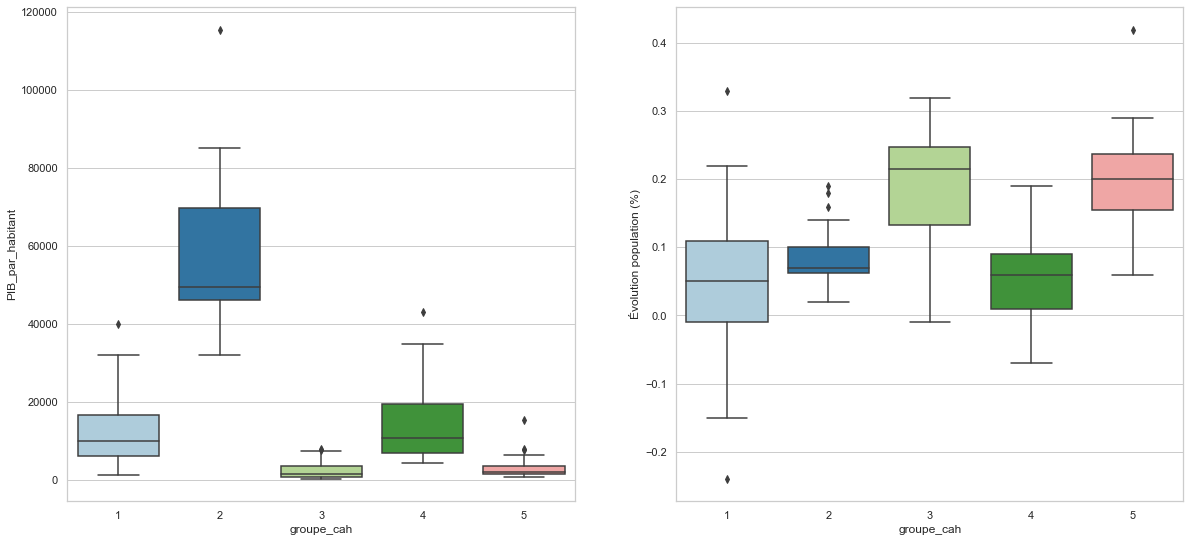

In [278]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='PIB_par_habitant')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='Évolution population (%)')




plt.savefig("exports/boxplot_dendogramme2.png")

plt.show(block=False)

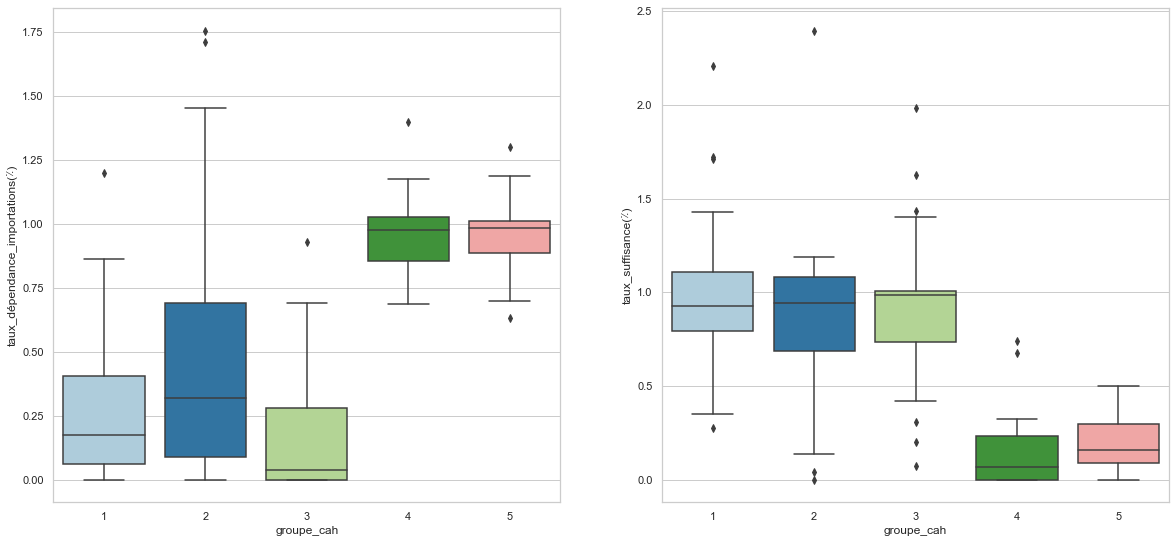

In [279]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))



plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_dépendance_importations(٪)')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='groupe_cah', y='taux_suffisance(٪)')



plt.savefig("exports/boxplot_dendogramme3.png")

plt.show(block=False)

In [280]:
df_select_pays_cah = df_groupes_cah[df_groupes_cah["groupe_cah"].isin([1,2]) == True]

df_select_pays_cah.to_csv('exports/df_select_pays_cah.csv', index=False)
df_select_pays_cah.shape

(55, 9)

In [277]:
#Pays du groupe 1 et 2 identifiés comme potentiellement intéressants

print('groupe 1')
print('----------')
print(df_groupe1_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 2')
print('----------')
print(df_groupe2_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 3')
print('----------')
print(df_groupe3_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 4')
print('----------')
print(df_groupe4_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')


print('groupe 5')
print('----------')
print(df_groupe5_cah['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')



groupe 1
----------
['Afrique du Sud' 'Albanie' 'Algérie' 'Arabie saoudite' 'Argentine'
 'Azerbaïdjan' 'Barbade' 'Bosnie-Herzégovine' 'Brésil' 'Bélarus' 'Chili'
 'Chine, continentale' 'Chypre' 'Colombie' 'Costa Rica' 'Croatie'
 'Espagne' 'Estonie' 'Fidji' 'Fédération de Russie' 'Grèce' 'Guyana'
 'Hongrie' 'Jamaïque' 'Japon' 'Kazakhstan' 'Koweït' 'Lettonie' 'Libye'
 'Lituanie' 'Malaisie' 'Maroc' 'Maurice' 'Mexique' 'Monténégro' 'Myanmar'
 'Ouzbékistan' 'Panama' 'Pologne' 'Portugal' 'Pérou' 'Roumanie'
 'République arabe syrienne' 'République dominicaine' 'Serbie' 'Slovénie'
 'Tchéquie' 'Trinité-et-Tobago' 'Tunisie' 'Turkménistan' 'Turquie'
 'Ukraine' 'Uruguay' 'Viet Nam' 'Égypte']
------------------------------------------------------------
------------------------------------------------------------
groupe 2
----------
['Allemagne' 'Australie' 'Autriche' 'Belgique' 'Canada'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao' 'Danemark' 'Finlande'
 'Irlande' 'Islande' 'Israël' 'Italie' 'L

Les clusters 3 et 5, situés majoritairement en Afrique, sont ceux qui ont les démographies les plus fortes et les PIB/habitants les plus faibles.

Les cluster  2 reflète au contraire des pays en moyenne plus riches comme les USA ou la plupart des pays européens.

Le cluster 1 et 4 sont dans une position intermédiaire.

Concernant les disponibilités alimentaires, celles-ci suivent les même tendances que le PIB. Les pays les plus pauvres ont un moindre accès à l’alimentation. Cela fait écho aux problème de sous-nutrition mis en évidence lors du projet 3.


La consommation de protéines animales confirme le partitionnement, avec une forte alimentation carnée de la part des clusters 4 et 2.



En revanche, les deux dernières variables évoluent bien différemment. Nous voyons que les clusters 2 et 5 sont ceux qui importent beaucoup plus de viandes de volailles qu’ils n’en produisent.

En effet, ce sont eux qui ont les taux d’autosuffisance parmi les plus bas. Au contraire, le cluster 1 est majoritairement autosuffisant et importe peu comparativement à sa production.



Compte tenu de tous ces paramètres, quel groupe serait-il approprié de choisir comme candidat pour notre marché international. Les groupes qui dépendent fortement des importations semblent être les meilleures cibles pour nos ventes.

Quels groupes 1, 2 et 5, et parmi eux nous avons choisi 1 et 2
Ces pays consomment en moyenne près de deux fois plus de protéines d'origine animale que ceux du groupe 5 ;

De plus, le PIB par habitant est plus élevé dans ces pays, ce qui nous permettra de vendre notre production plus facilement et à meilleur prix.


En conclusion pour cette première division, 64 pays deviendraient vraisemblablement une cible appropriée pour l'entreprise. La demande sera présente dans ces pays.
Appliquons une autre méthode, celle des K-Means, afin de pouvoir comparer cette première sélection...

# Application de l'algorithme du K-Means


Le clustering K-Means est une méthode de clustering simple mais puissante qui crée 𝑘 segments distincts des données où la variation au sein des clusters est aussi petite que possible. Pour trouver le nombre optimal de clusters, je vais essayer différentes valeurs de 𝑘 et calculer l'inertie, ou score de distorsion, pour chaque modèle.
 L'inertie mesure la similarité du cluster en calculant la distance totale entre les points de données et leur centre de cluster le plus proche. Les clusters avec des observations similaires ont tendance à avoir des distances plus petites entre eux et un score de distorsion plus faible dans l'ensemble.

## La méthode de coude nous aidera pour identifier les clusters.


•Nous choisissons 'K' manuellement, par visualisation.

• Calculer les distances entre les points d'un cluster (With-in Cluster Sum of Squares "WCSS").

• Si nous minimisons 'WCSS', nous avons atteint la solution de clustering parfaite.


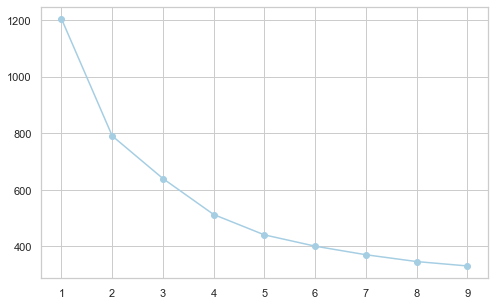

In [121]:
from sklearn.cluster import KMeans
from sklearn import cluster


K=range(1,10)
k_means = []
#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in K:
    #pour chaque k, on crée un modèle et on l’ajuste
    km=KMeans(n_clusters=k,init="k-means++").fit(X_cr)
     #on stocke l’inertie associée
    k_means.append(km.inertia_)


#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), k_means, marker='o')
plt.show()

In [122]:
mycenters = pd.DataFrame({'groupe_km' : K, 'WSS' : k_means})
mycenters

,groupe_km,WSS
0,1,1204.000000
1,2,790.498375
2,3,639.878353
3,4,512.893379
4,5,441.000063
5,6,401.076545
6,7,370.820961
7,8,346.731461
8,9,331.231449


Idéalement, pour optimiser et ne pas perdre trop d'informations, il est conseillé de choisir k = 5 .
 Un clustering  en 5 permettra de de comparer le partitionnement avec les groupes de la classification hiérarchique. Il est pertinent de comparer les deux méthodes sur le même nombre de clusters.



In [123]:

#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_cr)
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans5 = cls5.labels_

cls5.cluster_centers_ 
#Afficher la position finale du centroïde


array([[-0.63005087,  0.56627013,  0.49577032,  0.33187291, -0.07556566,
         0.61747583, -0.57994548],
       [ 0.74888832, -0.90997414, -0.88578093, -1.03062249, -0.60494926,
         0.37160626, -0.69459862],
       [-0.25632475,  1.39844184,  1.46221397,  1.19930781,  2.47140183,
         0.40412155,  0.16966558],
       [-0.58355686,  0.24445737,  0.38278801,  0.84592793,  0.13153652,
        -1.1064191 ,  1.23541374],
       [ 0.93096789, -0.87508393, -0.96534375, -0.63268321, -0.56334764,
        -1.24138905,  1.22726642]])

On obtient donc un tableau de 5 lignes et 7 colonnes, pourquoi ?
Nous avons cinq groupes et sept variables.
**Pour réduire les dimensions, nous avons besoin de pca**

# Visualisation des clusters en ACP pour la projection des données


Le principe de **la réduction de dimension** est de réduire la complexité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension .

Le principe  de **ACP** est de projeter nos données sur des axes appelés Composantes Principales, en cherchant à minimiser la distance entre nos points et leur projections. De cette manière on réduit la dimension préservant au maximum la variance de nos données. Pour **Préserver un maximum de variance pour optenir la projection qu'il soit la plus fidèle possible à nos données.**
 
 Analyse Pour trouver les axes de projection (xp): 
 Pour faire ça dans point de vue mathématique on
 1. On calcule la matrice de covariance des données 
 2. On détermine les vecteurs propres de cette matrice : ce sont les Composantes Principales 
 3. (On projette les données sur ces axes)
 


 
**L'ACP (Analyse en Composante Principale) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appréhender le "comportement" des différents groupes.**

PCA est un transformer ! 
1. Définir le nombre de composantes 
2. Transformer les données avec fit transform()

Il y a deux cas possibles pour choisir le nombre de composantes sur lesquels projeter nos données? et bien :
1. Celui dans lequel vous cherchez à visualiser vos données dans un espace de 2d ou 3D ,pour ça c'est très simple, le nombre de composants doit être égale à deux ou trois
2. Celui dans lequel vous cherchez à compresser vos données pour accélérer l'apprentissage de la machine sur des taches de classification ou de régression, pour ça il faut choisir le nombre de composantes de telle sorte à préserver entre 95 et 99 % de la variance de vos données.

### Définir le nombre de composantes 

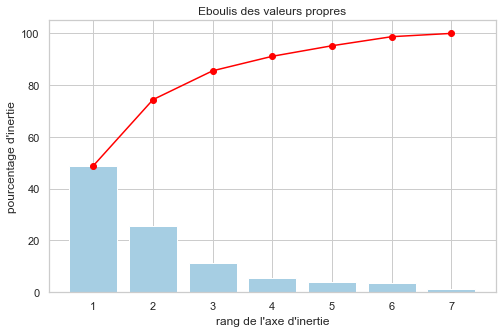

[ 48.85719311  74.40827835  85.55342329  91.15818575  95.23028109
  98.72806428 100.        ]


array([48.85719311, 25.55108525, 11.14514494,  5.60476246,  4.07209534,
        3.49778319,  1.27193572])

In [124]:
import pca as pca
from sklearn import decomposition
#Représentation de la variance expliquée 
model_pca = decomposition.PCA().fit(X_cr)

#nous allons examiner quel est le pourcentage de variance préserver pour chacune de nos composantes.
scree = model_pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')   
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree




Environ 70 % de la variance des données s'explique par ces deux premières composantes.

La méthode du coude précise une forte représentation de nos variables sur les deux premières composantes principales, le premier axe factoriel.

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


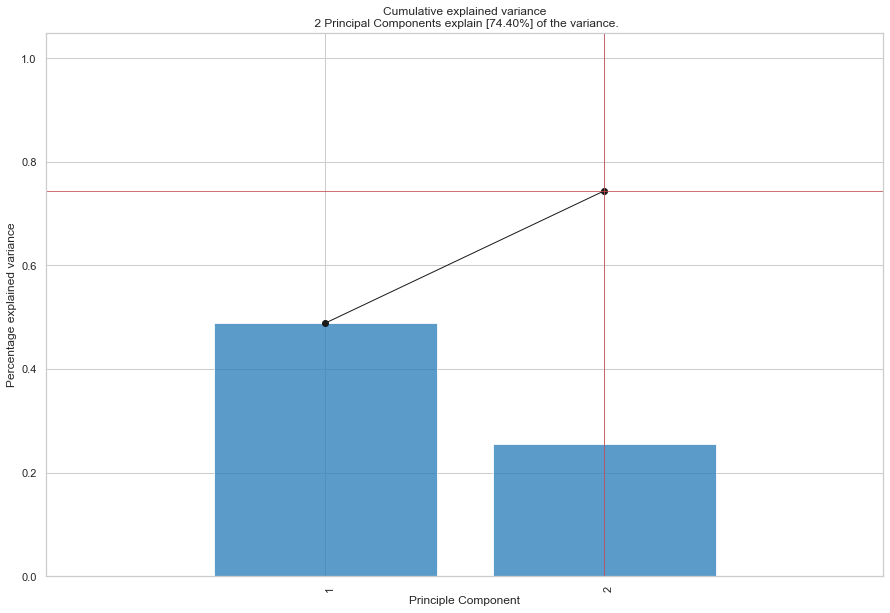

<Figure size 576x360 with 0 Axes>

[ 48.85719311  74.40827835  85.55342329  91.15818575  95.23028109
  98.72806428 100.        ]


array([48.85719311, 25.55108525, 11.14514494,  5.60476246,  4.07209534,
        3.49778319,  1.27193572])

In [125]:
from pca import pca
model_pca = pca(n_components=2)

results = model_pca.fit_transform(X_cr)

fig, ax = model_pca.plot()
plt.show()

#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(scree.cumsum())
scree

[pca] >Plot PC1 vs PC2 with loadings.


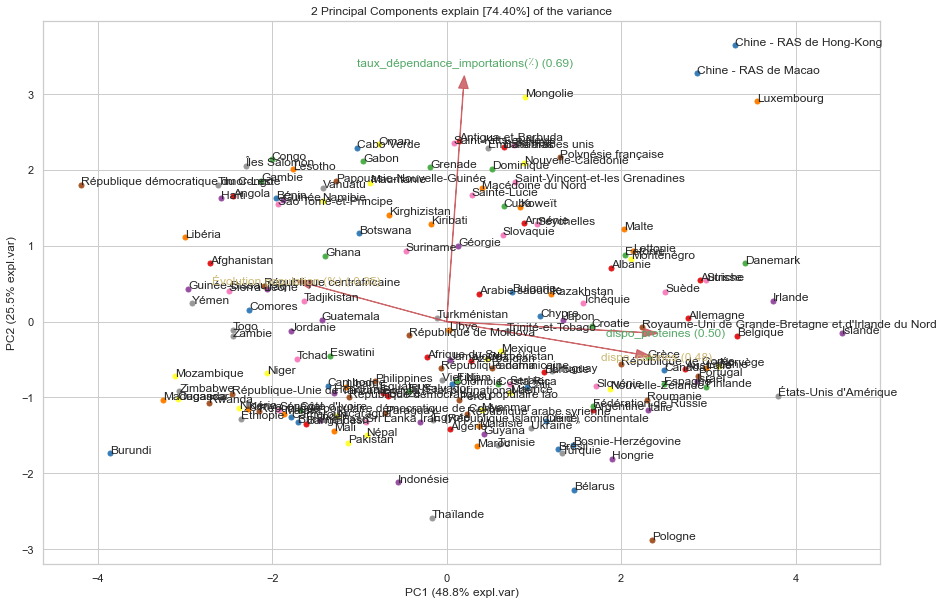

In [126]:
fig, ax = model_pca.biplot(n_feat=4, legend=None)

In [127]:
model_pca

In [128]:
model_pca.transform(X_cr)

[pca] >Processing dataframe..


,PC1,PC2
Afghanistan,-2.717782,0.770299
Afrique du Sud,-0.220664,-0.472169
Albanie,1.886392,0.708115
Algérie,0.040593,-1.419012
Allemagne,2.767122,0.045353
...,...,...
Émirats arabes unis,0.478370,2.289497
Équateur,-0.765438,-0.890592
États-Unis d'Amérique,3.798569,-0.974743
Éthiopie,-2.363048,-1.281446


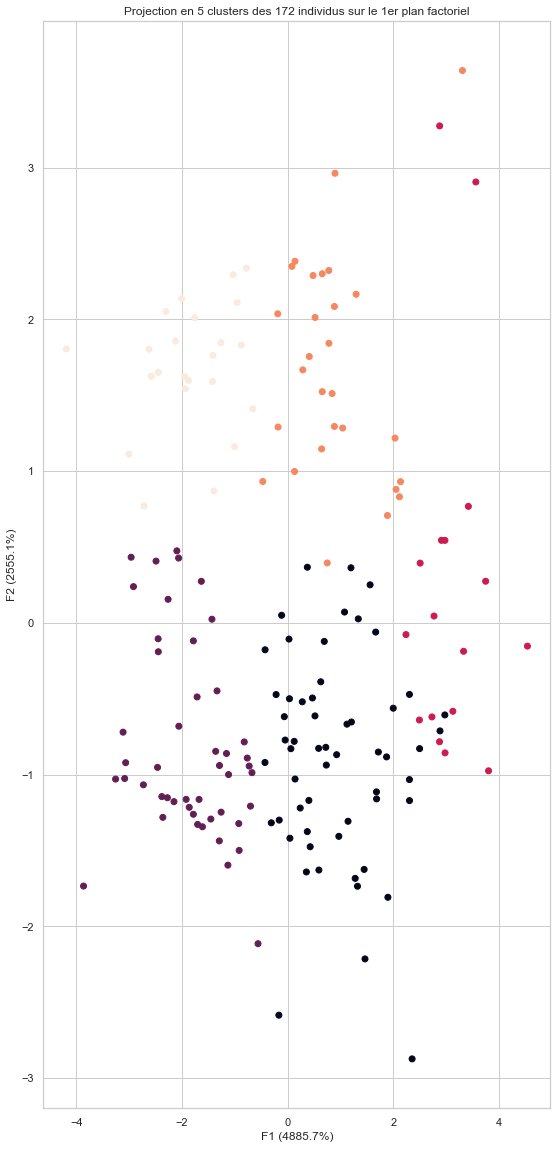

In [129]:
#Coordonnées factorielles 
model_pca = decomposition.PCA().fit(X_cr)
X_projected = model_pca.transform(X_cr)

plt.figure(figsize=(20,20))
plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls5.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*scree[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*scree[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("exports/projection_clusters.png")
plt.show()

L'analyse sera plus fine en 5 clusters. De plus, la comparaison sera possible avec les 5 groupes identifiés lors du précédent partitionnement, le contexte nous oriente davantage vers un clustering en 5 partitions.

Maintenant, il est nécessaire de caractériser chacun de ces groupes selon nos 8 variables. La position des centroïdes de chacun des groupes indiquera le ou les meilleurs clusters. C'est l'avantage de procéder en K-Means, afin d'obtenir directement des valeurs centrées et réduites, facilitant l'analyse. ⬇️

In [130]:
#Tableau des Centroïdes 5 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls5.cluster_centers_
centroids


array([[-0.63005087,  0.56627013,  0.49577032,  0.33187291, -0.07556566,
         0.61747583, -0.57994548],
       [ 0.74888832, -0.90997414, -0.88578093, -1.03062249, -0.60494926,
         0.37160626, -0.69459862],
       [-0.25632475,  1.39844184,  1.46221397,  1.19930781,  2.47140183,
         0.40412155,  0.16966558],
       [-0.58355686,  0.24445737,  0.38278801,  0.84592793,  0.13153652,
        -1.1064191 ,  1.23541374],
       [ 0.93096789, -0.87508393, -0.96534375, -0.63268321, -0.56334764,
        -1.24138905,  1.22726642]])

In [131]:
pd.DataFrame(centroids, columns=df_clus.columns)

,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪)
0,-0.630051,0.566270,0.495770,0.331873,-0.075566,0.617476,-0.579945
1,0.748888,-0.909974,-0.885781,-1.030622,-0.604949,0.371606,-0.694599
2,-0.256325,1.398442,1.462214,1.199308,2.471402,0.404122,0.169666
3,-0.583557,0.244457,0.382788,0.845928,0.131537,-1.106419,1.235414
4,0.930968,-0.875084,-0.965344,-0.632683,-0.563348,-1.241389,1.227266


In [132]:
#Index trié des clusters
idk = np.argsort(cls5.labels_)
#Affichage des observations selon leurs clusters
df_cls5 = pd.DataFrame(df_clus.index[idk], cls5.labels_[idk]).reset_index()
df_cls5 = df_cls5.rename(columns={'index':'groupe_km'})
df_cls5

,groupe_km,pays
0,0,Tchéquie
1,0,Colombie
2,0,Panama
3,0,Costa Rica
4,0,Ouzbékistan
...,...,...
167,4,Namibie
168,4,Oman
169,4,Papouasie-Nouvelle-Guinée
170,4,Guinée


In [133]:
#Intégration des clusters dans notre dataframe "df_cls5" par la méthode .merge()
#Jointure avec le dataframe initial "df_alim" selon les pays et condition 'inner'
df_cls5 = pd.merge(df_clus, df_cls5, on='pays')
df_cls5

,pays,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪),groupe_km
0,Afghanistan,0.25,2273.0,57.31,0.18,469.919090,0.417910,0.656716,4
1,Afrique du Sud,0.14,2898.0,79.77,0.44,6001.389576,0.830741,0.223239,0
2,Albanie,-0.03,3338.0,116.02,0.54,5303.197823,0.352941,0.647059,3
3,Algérie,0.18,3493.0,90.84,0.27,3975.510381,1.013937,0.000000,0
4,Allemagne,0.03,3559.0,104.24,0.60,46231.563366,0.901869,0.485397,2
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,0.19,3084.0,80.43,0.44,43103.323058,0.069337,1.057011,3
168,Équateur,0.15,2563.0,64.09,0.51,6183.823825,0.996805,0.000000,1
169,États-Unis d'Amérique,0.07,3862.0,115.01,0.66,65133.731652,1.184659,0.006375,2
170,Éthiopie,0.24,2439.0,70.55,0.09,827.544333,0.987179,0.012821,1


In [134]:
df_cls5.head()

,pays,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪),groupe_km
0,Afghanistan,0.25,2273.0,57.31,0.18,469.919090,0.417910,0.656716,4
1,Afrique du Sud,0.14,2898.0,79.77,0.44,6001.389576,0.830741,0.223239,0
2,Albanie,-0.03,3338.0,116.02,0.54,5303.197823,0.352941,0.647059,3
3,Algérie,0.18,3493.0,90.84,0.27,3975.510381,1.013937,0.000000,0
4,Allemagne,0.03,3559.0,104.24,0.60,46231.563366,0.901869,0.485397,2


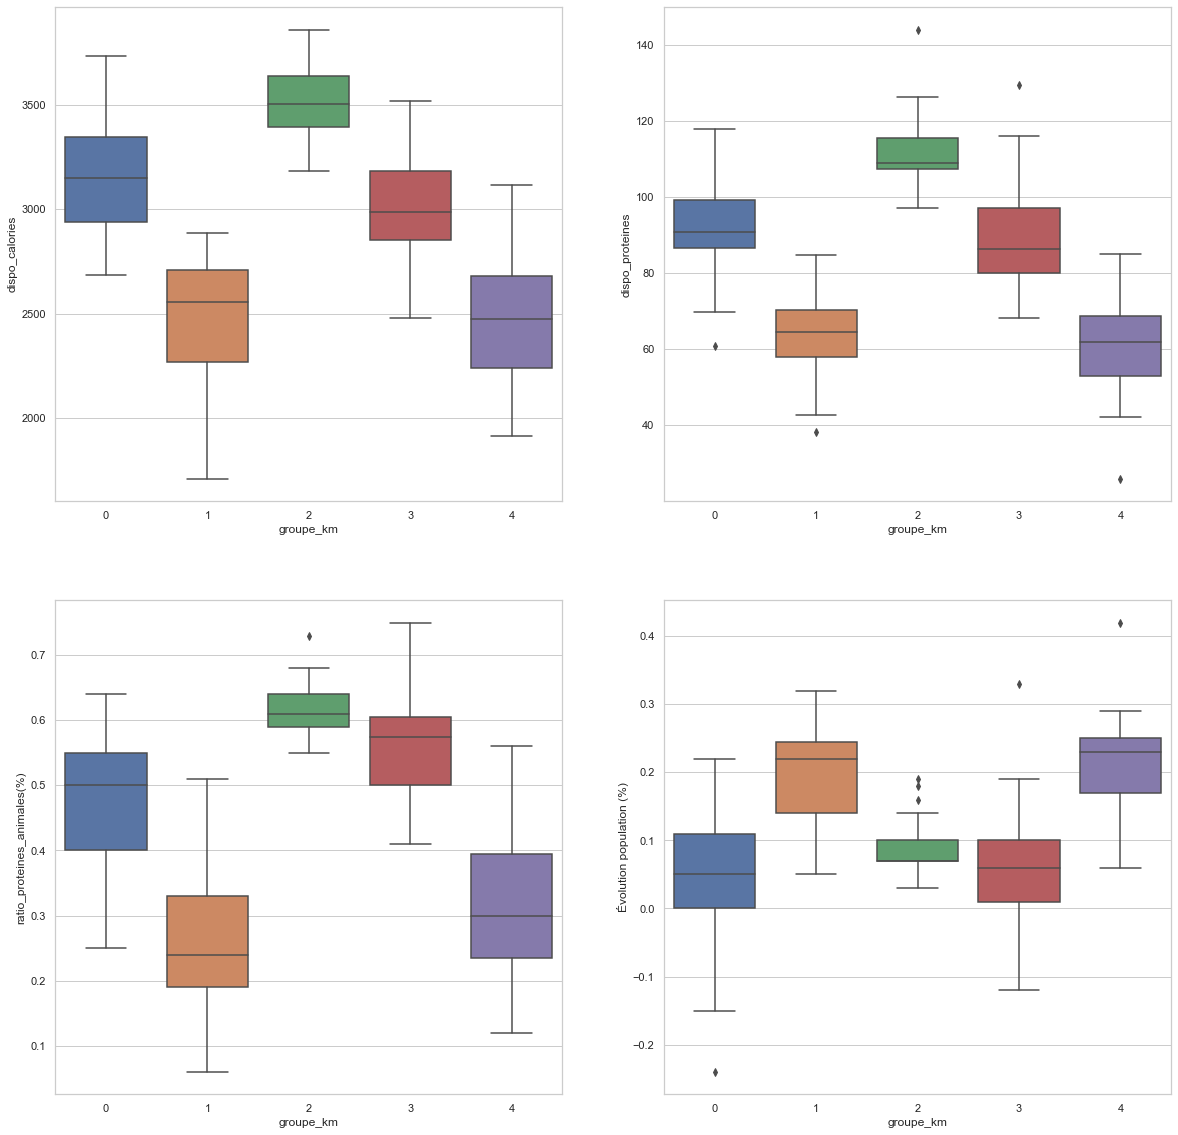

In [142]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_calories')

plt.subplot(222)
sns.boxplot(data=df_cls5, x='groupe_km', y='dispo_proteines')

plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='ratio_proteines_animales(%)')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='groupe_km', y='Évolution population (%)')

plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)

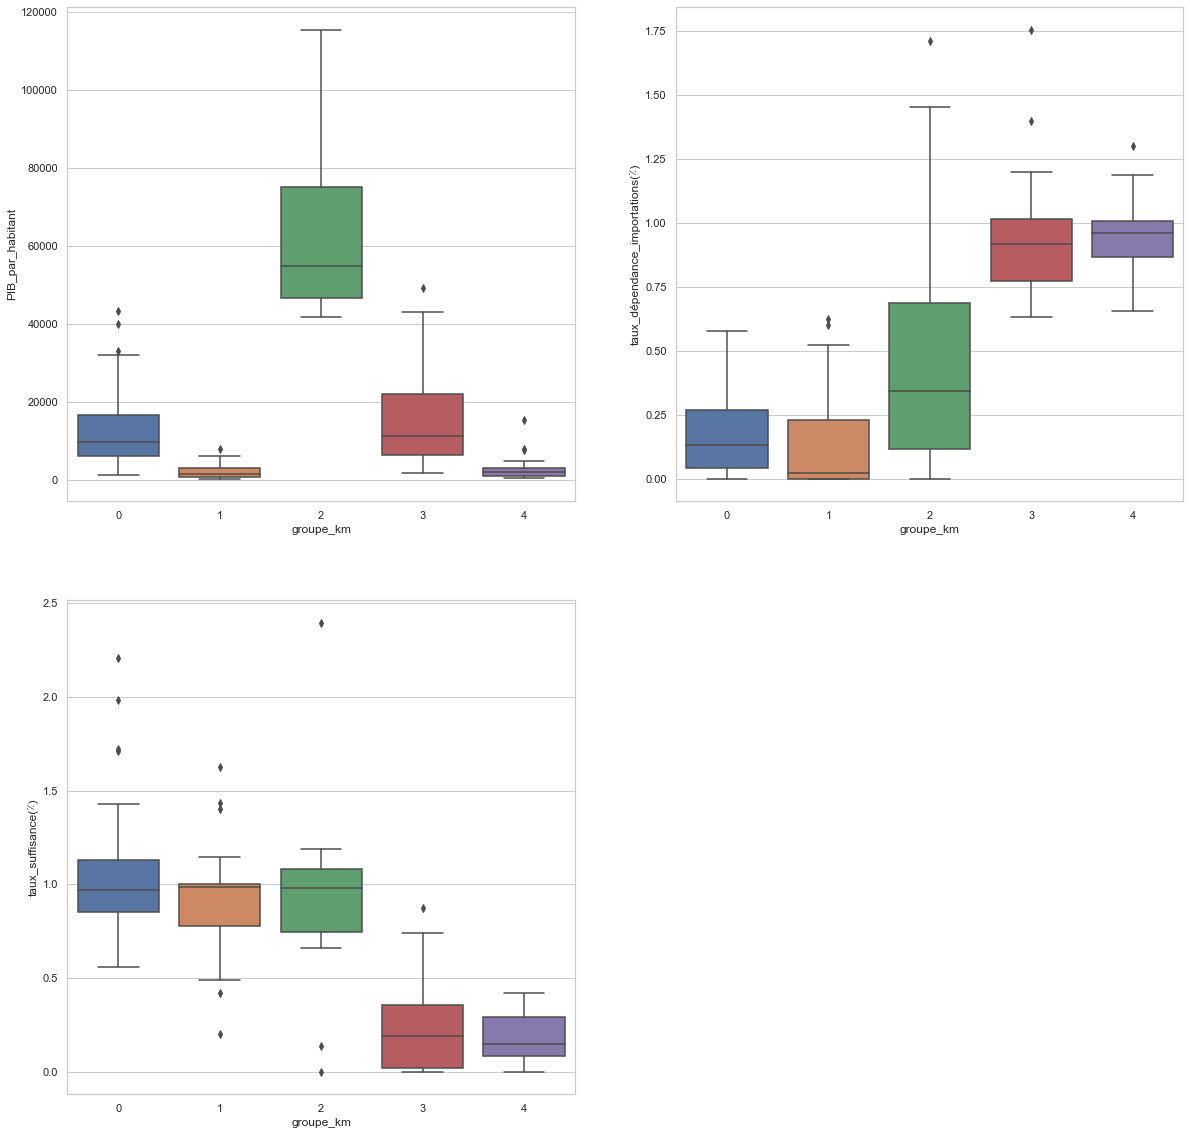

In [143]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='groupe_km', y='PIB_par_habitant')


plt.subplot(222)
sns.boxplot(data=df_cls5, x='groupe_km', y='taux_dépendance_importations(٪)')


plt.subplot(223)
sns.boxplot(data=df_cls5, x='groupe_km', y='taux_suffisance(٪)')


plt.savefig("exports/boxplot_dendogramme3.png")




plt.show(block=False)



En se basant sur les mêmes critères que lors de la sélection des pays par CAH (évolution importante de la population et bilan alimentaire trop faible), les clusters Kmeans à selectionner sont  clusters0 et clusters 4

In [144]:
#Affichage des pays retenus dans ce clustering
#Sélection selon l'importance du ratio des protéines animales et dispo. calorique en réponse 
#d'une problématique ciblée sur le régime alimentaire des pays
print('groupe 0')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 0]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 1')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 1]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 2')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 2]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 3')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 3]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')

print('groupe 4')
print('----------')
print(df_cls5[df_cls5['groupe_km'] == 4]['pays'].unique())
print('------------------------------------------------------------')
print('------------------------------------------------------------')




groupe 0
----------
['Afrique du Sud' 'Algérie' 'Arabie saoudite' 'Argentine' 'Azerbaïdjan'
 'Barbade' 'Bosnie-Herzégovine' 'Brésil' 'Bélarus' 'Chili'
 'Chine, continentale' 'Chypre' 'Colombie' 'Costa Rica' 'Croatie'
 'El Salvador' 'Espagne' 'Fidji' 'Fédération de Russie' 'Grèce' 'Guyana'
 'Hongrie' "Iran (République islamique d')" 'Italie' 'Jamaïque' 'Japon'
 'Kazakhstan' 'Libye' 'Lituanie' 'Malaisie' 'Maroc' 'Maurice' 'Mexique'
 'Myanmar' 'Nouvelle-Zélande' 'Ouzbékistan' 'Panama' 'Pologne' 'Portugal'
 'Pérou' 'Roumanie' 'République arabe syrienne' 'République de Corée'
 'République de Moldova' 'République dominicaine' 'Serbie' 'Slovénie'
 'Tchéquie' 'Thaïlande' 'Trinité-et-Tobago' 'Tunisie' 'Turkménistan'
 'Turquie' 'Ukraine' 'Uruguay' 'Viet Nam' 'Égypte']
------------------------------------------------------------
------------------------------------------------------------
groupe 1
----------
['Bangladesh' 'Belize' 'Bolivie (État plurinational de)' 'Burkina Faso'
 'Burundi' 'Cambo

In [145]:
#La correspondance avec les groupes du partitionnement hiérarchique peut-être analysée avec une méthode .crosstab()
pd.crosstab(clusters_cah, cls5.labels_)



col_0,0,1,2,3,4
row_0,,,,,
1,50,0,0,5,0
2,3,0,17,2,0
3,4,47,0,0,3
4,0,0,0,19,0
5,0,0,0,2,20


In [146]:
#Création d'un sous-ensemble avec sélection des pays des deux clusters 1 & 2 validés
df_cls_subset = df_cls5.query('[3,2] in groupe_km') 
df_cls_subset.shape

(45, 9)

In [140]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset.head(19)


,pays,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪),groupe_km
2,Albanie,-0.03,3338.0,116.02,0.54,5303.197823,0.352941,0.647059,3
4,Allemagne,0.03,3559.0,104.24,0.60,46231.563366,0.901869,0.485397,2
6,Antigua-et-Barbuda,0.11,2485.0,80.80,0.64,17112.821135,0.000000,1.000000,3
9,Arménie,0.02,3022.0,94.29,0.56,4622.733216,0.218182,0.781818,3
10,Australie,0.14,3417.0,107.94,0.68,54763.202388,1.028158,0.007241,2
11,Autriche,0.07,3691.0,108.95,0.59,49700.761833,0.745763,0.638418,2
13,Bahamas,0.10,2626.0,76.10,0.64,34863.742098,0.272727,1.136364,3
16,Belgique,0.06,3800.0,100.34,0.60,46198.310321,2.395722,1.711230,2
22,Bulgarie,-0.07,2854.0,82.24,0.50,9703.487814,0.677019,0.689441,3
30,Canada,0.10,3539.0,108.55,0.56,46550.335507,0.978530,0.116461,2


In [141]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset['pays'].unique()

array(['Albanie', 'Allemagne', 'Antigua-et-Barbuda', 'Arménie',
       'Australie', 'Autriche', 'Bahamas', 'Belgique', 'Bulgarie',
       'Canada', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Cuba', 'Danemark', 'Dominique', 'Estonie', 'Finlande', 'Grenade',
       'Géorgie', 'Irlande', 'Islande', 'Israël', 'Kiribati', 'Koweït',
       'Lettonie', 'Luxembourg', 'Macédoine du Nord', 'Malte', 'Mongolie',
       'Monténégro', 'Norvège', 'Nouvelle-Calédonie',
       'Polynésie française',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines',
       'Sainte-Lucie', 'Samoa', 'Seychelles', 'Slovaquie', 'Suisse',
       'Suriname', 'Suède', 'Émirats arabes unis',
       "États-Unis d'Amérique"], dtype=object)

Liste des pays et recommandations
Dans un premier temps, on suggère donc de cibler les pays de l'UE, pour leur proximité et la facilité des échanges commerciaux : l'Allemagne,  les Pays-Bas, la Suède ,Luxembourg et l'Italie.

Prudence avec le Royaume-Uni, puisqu'avec le Brexit, les échanges commerciaux avec l'UE sont actuellement compliqués. Pour autant, considérant les intérêts économiques mutuels, les récentes directives qui ont été prises pour favoriser ces échanges sont en notre faveur.

Dans un second temps, on pourrait également cibler les pays comme Hong Kong, le Japon, , ainsi que le Koweït.

FAO - Poultry production - Marchés et commerce
https://www.fao.org/poultry-production-products/aspects-socio-economiques/marches-et-commerce/fr/

"Le Brésil est le principal exportateur de viande de volaille, suivi par les États-Unis et les Pays-Bas. Les principaux pays importateurs sont la Chine, le Japon, le Mexique et le Royaume-Uni."

"Les pays les moins avancés sont de plus en plus dépendants des importations de viande de volaille. Le niveau de leurs importations est passé de 3 pour cent en 1961 à environ 30 pour cent en 2013."

FAO - Poultry production

https://www.fao.org/poultry-production-products/production/fr/

"Les États-Unis d'Amérique sont le plus grand producteur de viande de volaille à l’échelle de la planète: ils produisent en effet 17 pour cent de la production mondiale. Viennent ensuite la Chine et le Brésil."

"Pour répondre à la demande croissante, la production de viande de volaille mondiale a bondi, passant de 9 à 132 millions de tonnes entre 1961 et 2019."

"En 2019, la viande de volaille représentait environ 39 pour cent de la production mondiale de viande."

"Dans les pays en développement, environ 80 pour cent des ménages ruraux élèvent des volailles."

# Tests statistiques
## Nos groupes sont-ils réellement distincts?
### Test d'adéquation de Kolmogorov-Smirnov :
On peut tester l’adéquation de la 'Disponibilité alimentaire de prot (g/personne/jour)' à une loi normale à l’aide de Kolmogorov-Smirnov. Le test sera doublé par celui de Shapiro-Wilk.

In [66]:
import scipy.stats as st
from scipy import stats
from scipy.stats import ks_2samp

### Vérification des hypothèses

**H0 = La variable suit donc  une loi normale .**

**H1 = La variable ne suit pas une loi normale.**

In [67]:
df_groupes_cah.head(1)

,pays,Évolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales(%),PIB_par_habitant,taux_suffisance(٪),taux_dépendance_importations(٪),groupe_cah
0,Afghanistan,0.25,2273.0,57.31,0.18,469.91909,0.41791,0.656716,3


In [68]:
#Kolmogorov Smirnov test
stat, p= st.ks_2samp(df_groupes_cah['dispo_proteines'], 
            np.random.normal(df_groupes_cah['dispo_proteines'].mean(), 
                             df_groupes_cah['dispo_proteines'].std(ddof=0),
                             df_groupes_cah['dispo_proteines'].count()))

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print(' Nous pouvons accepter H0 pour des niveaux de test de 5 %')
else:
    print('H0 est rejetée à un niveau de test de 5%')
    

Statistics=0.093, p=0.447
 Nous pouvons accepter H0 pour des niveaux de test de 5 %


### Test d'adéquation de Shapiro-Wilk :

*Recommandé pour tester la normalité dans le cas de petits échantillons.

In [69]:
#creation of the df with only clusters 4 & 5
c4c5 = df_groupes_cah[(df_groupes_cah['groupe_cah'] == 3) | (df_groupes_cah['groupe_cah'] == 5)]

In [70]:
#conda install -c conda-forge pingouin
#Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. 

In [71]:
#normality of variables in c4c5
import pingouin as pg
pg.normality(c4c5, method='shapiro', alpha=0.05).drop('groupe_cah')



,W,pval,normal
Évolution population (%),0.972905,1.031434e-01,True
dispo_calories,0.974100,1.219575e-01,True
dispo_proteines,0.979530,2.574547e-01,True
ratio_proteines_animales(%),0.977172,1.868772e-01,True
PIB_par_habitant,0.765521,1.125297e-09,False
taux_suffisance(٪),0.923572,2.082295e-04,False
taux_dépendance_importations(٪),0.829009,6.157860e-08,False


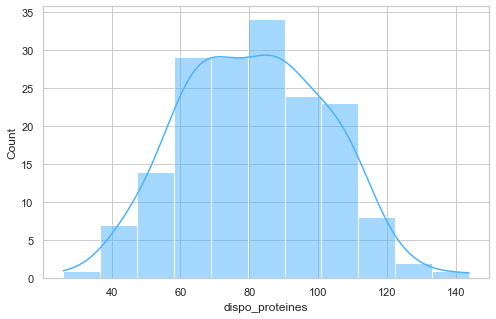

In [72]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_proteines', kde=True, color='#4cb2ff')
plt.show()

#### Disponibilité alimentaire énergétique


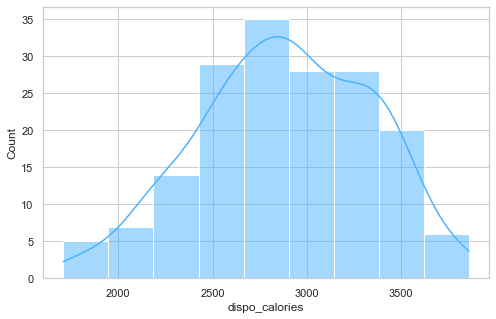

In [73]:
#histogram
sns.histplot(data=df_groupes_cah, x='dispo_calories', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


In [74]:
#histogram
sns.histplot(data=df_groupes_cah, x='Evolution population (%)', kde=True, color='#4cb2ff')
plt.show()

ValueError: Could not interpret value `Evolution population (%)` for parameter `x`

#### Pourcentage de protéine animale


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='ratio_proteines_animales', kde=True, color='#4cb2ff')
plt.show()

#### Produit Intérieur Brut


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='PIB par habitant', kde=True, color='#4cb2ff')
plt.show()

#### Importation de viande de volaille


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='Production', kde=True, color='#4cb2ff')
plt.show()


In [ ]:
#histogram
sns.histplot(data=df_groupes_cah, x='taux_suffisance(٪)', kde=True, color='#4cb2ff')
plt.show()

### Test de comparaison de deux clusters dans le cas gaussien.



#### La variable 'dispo_proteines' suit une loi normale et sera par conséquent choisie pour le test.

In [ ]:
#On teste tout d’abord l’égalité des variances à l’aide de la commande
pg.homoscedasticity(c4c5, dv='dispo_proteines', 
                    group='groupe_cah', method='levene', 
                    alpha=0.05)

In [ ]:
#On teste ensuite l’égalité des moyennes à l’aide de la commande
pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
         df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5],
         paired=False,
        
         confidence=0.95)

### Conclusion

In [ ]:
α = 0.05

if α > pg.ttest(df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 3],
             df_groupes_cah['dispo_proteines'][df_groupes_cah['groupe_cah'] == 5]).iloc[0,3] : 
    
    print("La p-value étant inférieure au risque α, on rejette donc H0, les moyennes des deux groupes sont différentes.")
else :
    print("La p-value étant supérieur au risque α, H0 est donc vrai, les moyennes des deux groupes sont égales.")